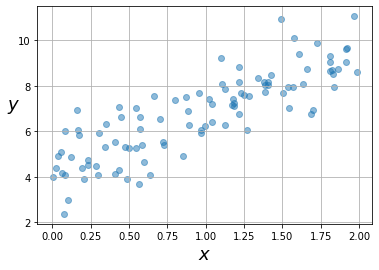

(100, 1) (100, 1)


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import random
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

# mean center
# X -= np.average(X, axis=0)
# y -= np.average(y, axis=0)
# # putting in a ball of 1
# sx = np.max(abs(X),axis = 0)
# sy = np.max(abs(y))
# X /= sx
# y /= sy

plt.figure()
plt.scatter(X,y, alpha =0.5)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.show()

print (X.shape, y.shape)

In [101]:
'''
X    = Matrix of X with added bias units
y    = Vector of Y
theta=Vector of thetas np.random.randn(j,1)
learning_rate 
iterations = no of iterations

Returns the final theta vector and array of cost history over no of iterations
'''
    
def MSE(theta,X,y):    
    predictions = X.dot(theta)
    cost = (1/2*len(y)) * np.sum(np.square(predictions-y))
    return cost

def loss(theta,X,y):    
    predictions = X.dot(theta)
    loss = np.sum(np.square(predictions-y))
    return loss
    

def getGradient(X,y,theta):
    prediction = np.dot(X,theta)
    gradient = X.T.dot((prediction - y))
    return gradient

def getGradient2(X,y,theta):
    prediction = np.dot(X,theta)
    gradient = np.array([X[0]*(prediction - y),X[1]*(prediction - y)])
    return gradient
    
def getDirection(X,y,theta, sigma=0.4):
    out = np.zeros_like(theta)
    d = theta.shape[0]
    directions = np.random.normal(size = (8,d)) # random 8 direction
    fx = loss(theta,X,y)
    for di in directions:
        di = np.array([di]).T
        fxnew = loss(theta+ sigma*di,X,y)
        out += (1.0/8*sigma) * np.sum(fxnew-fx)*di
        
    return out # direction to move
    

def zeroOrder_descent(X,y,theta,learning_rate=0.01,iterations=100):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        # getDirection will give direction without calculating gradient
        direction = getDirection(X,y,theta)
        theta = theta -(1/m)*learning_rate*(direction)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        gradient = getGradient(X,y,theta)
        theta = theta -(1/m)*learning_rate*(gradient)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history
# implementing normal SGD
def SGD(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    print(m)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        n = random.randint(0,m-1) #picking a random values
        gradient = getGradient2(X[n],y[n],theta)
        theta = theta -learning_rate*(gradient)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history
#implementing average SGD
def AVG_SGD(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(0,iterations):
        n = random.randint(0,m-1) #picking a random values
        gradient = getGradient2(X[n],y[n],theta)
        theta = ((theta*it) + theta - learning_rate*(gradient))/(it+1)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history

#implementing ADAM
def ADAM(X,y,theta,learning_rate=0.001,iterations=1000,b1=0.9, b2=0.99, e =1e-8, m=0, v=0):
  no_points = len(y)
  cost_history = np.zeros(iterations)
  theta_history = np.zeros((iterations,2))
  #m_his1 = np.zeros((iterations,2))
  for it in range(0,iterations):
    n = random.randint(0,no_points-1) #picking a random values
    gradient = getGradient2(X[n],y[n],theta)
    m = b1*m + (1-b1)*gradient
    m1 = m/(1-b1**(it+1))
    gradient_sq = gradient**2
    v = b2*v + (1-b2)*gradient_sq
    v1= v/(1-b2**(it+1))
    #m_his1[it,:] = m.T
    theta = theta -(learning_rate*(1/(np.sqrt(v1) + e))*m1)
    theta_history[it,:] =theta.T
    cost_history[it]  = MSE(theta,X,y)
  return theta, cost_history, theta_history

#implementing NAG
def NAG(X,y,theta,learning_rate=0.01,iterations=100, momentum =0.9):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    n = random.randint(0,m-1) #picking a random values
    gradient = getGradient2(X[n],y[n],theta)
    theta = theta -learning_rate*(gradient)
    theta_history[0,:] =theta.T
    cost_history[0]  = MSE(theta,X,y)
    
    for it in range(1, iterations):
        n = random.randint(0,m-1) #picking a random values
        gradient = momentum*gradient + getGradient2(X[n],y[n],(theta- momentum*gradient))
        theta = theta -learning_rate*(gradient)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
    return theta, cost_history, theta_history

#implementing momentum
def MOM(X,y,theta,learning_rate=0.01,iterations=100, momentum =0.9):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    n = random.randint(0,m-1) #picking a random values
    gradient = getGradient2(X[n],y[n],theta)
    theta = theta -learning_rate*(gradient)
    theta_history[0,:] =theta.T
    cost_history[0]  = MSE(theta,X,y)
    print(theta,"theta MOM")
    
    for it in range(1, iterations):
        n = random.randint(0,m-1) #picking a random values
        gradient = momentum*gradient + getGradient2(X[n],y[n],theta)
        theta = theta -learning_rate*(gradient)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
    return theta, cost_history, theta_history

#implementing ADADELTA
def ADADELTA(X,y,theta,learning_rate=0.01,iterations=100, momentum =0.9):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations+1,2))
    theta_history[0,:] =theta.T
    n = random.randint(0,m-1) #picking a random values
    gradient = getGradient2(X[n],y[n],theta)
    avg_gra = (1-momentum)*gradient**2
    avg_para = (1-momentum)*theta**2
    theta = theta -learning_rate*(gradient)
    theta_history[1,:] =theta.T
    cost_history[0]  = MSE(theta,X,y)
    
    for it in range(1, iterations):
        n = random.randint(0,m-1) #picking a random values
        gradient = getGradient2(X[n],y[n],theta)
        avg_gra = momentum*avg_gra + (1-momentum)*gradient**2
        avg_para = momentum*avg_para + (1-momentum)*(((theta_history[it,:]-theta_history[it-1,:])**2).reshape(2,1))
        learning_rate = (avg_para/avg_gra)**0.5
        theta = theta -learning_rate*(gradient)
        theta_history[it+1,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
    return theta, cost_history, theta_history[:iterations-1,:]




In [102]:
theta = np.random.randn(2,1)


Theta:  [[3.39596599]
 [3.37497694]]
Final cost/MSE:  5973.452


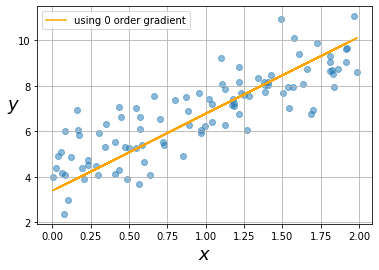

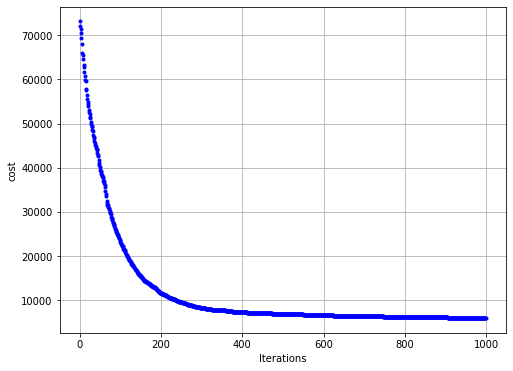

In [103]:
lr =0.01
n_iter = 1000
#theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta0,cost_history0,theta_history0 = zeroOrder_descent(X_b,y,theta,lr,n_iter)
print('Theta: ', theta0)
print('Final cost/MSE:  {:0.3f}'.format(cost_history0[-1]))

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history0,'b.')

Theta:  [[3.9854266 ]
 [2.85961293]]
Final cost/MSE:  4944.454


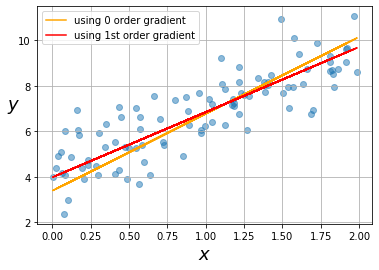

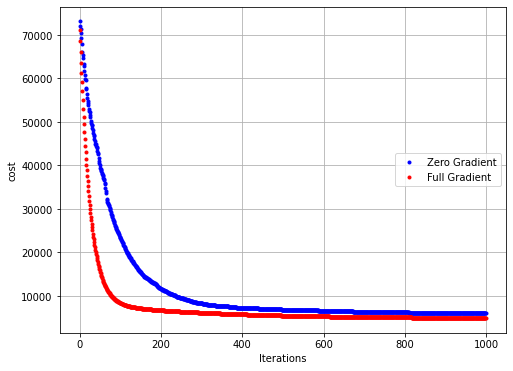

In [104]:
lr =0.01
n_iter = 1000
#theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta1,cost_history1,theta_history1 = gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta: ', theta1)
print('Final cost/MSE:  {:0.3f}'.format(cost_history1[-1]))

#plot theta
# plt.figure()
plt.scatter(X,y, alpha =0.5)

# comment next 2 lines if not showing 0 order here
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")

predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history0,'b.', label = "Zero Gradient")
_=ax.plot(range(n_iter),cost_history1,'r.', label = "Full Gradient")
ax.legend(loc = "right")

100
Theta:  [[3.89904094]
 [2.81076014]]
Final cost/MSE:  5058.548


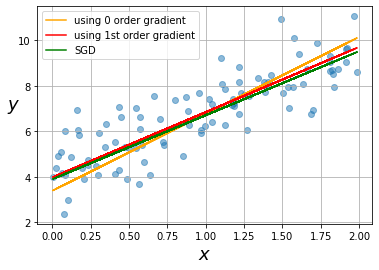

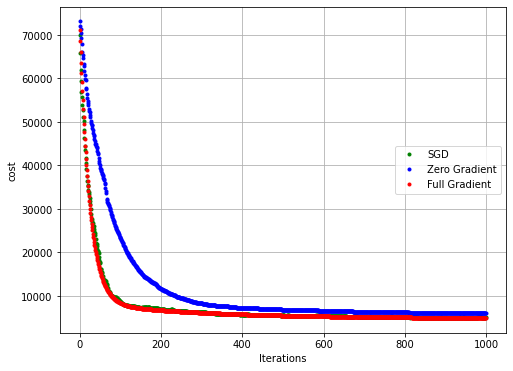

In [105]:
# running SGD
lr =0.01
n_iter = 1000
X_b = np.c_[np.ones((len(X),1)),X]

theta2,cost_history2,theta_history2 = SGD(X_b,y,theta,lr,n_iter)
print('Theta: ', theta2)
print('Final cost/MSE:  {:0.3f}'.format(cost_history2[-1]))

#plot theta

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)

# comment next 2 lines if not showing 0 order here
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")

predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")

predy = np.dot(X_b,theta2)
plt.plot(X,predy, "green", label= "SGD")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history2,'g.', label = "SGD")
_=ax.plot(range(n_iter),cost_history0,'b.', label = "Zero Gradient")
_=ax.plot(range(n_iter),cost_history1,'r.', label = "Full Gradient")
ax.legend(loc = "right")

**Observations**

SGD and Full gradiant both converge faster compared to Zeroth gradient descent
We can observe that the loss function reduces slightly faster for full gradient comapred to SGD but the final loss/cost is pretty much same.

Below graph helps to observe first 100 iterations closer.
Honestly for this data set and the problem SDG and full gradient behaves very similar. 
It is also evident that there are more fluctuations for SGD, where as Full gradient decent is always smooth.

Note: I have fixed the random Theta generation to be equal to all the models

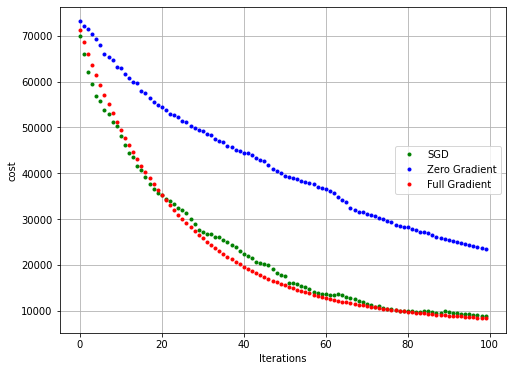

In [106]:

fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(100),cost_history2[:100],'g.', label = "SGD")
_=ax.plot(range(100),cost_history0[:100],'b.', label = "Zero Gradient")
_=ax.plot(range(100),cost_history1[:100],'r.', label = "Full Gradient")
ax.legend(loc = "right")

Theta:  [[2.55670085]
 [3.5112182 ]]
Final cost/MSE:  9945.528


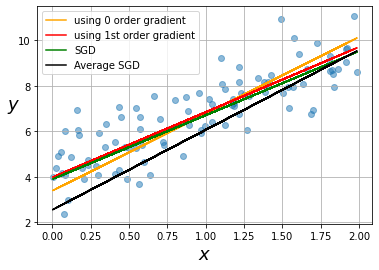

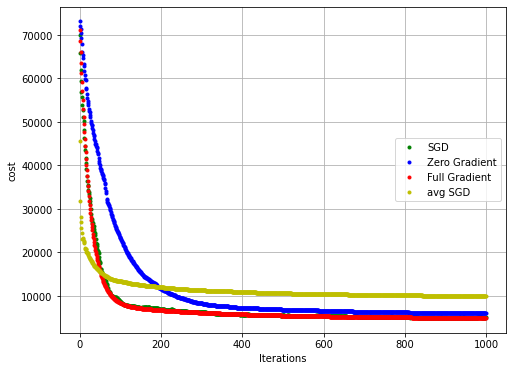

In [107]:
# Running average SGD
lr =0.1
n_iter = 1000
#theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta3,cost_history3,theta_history3 = AVG_SGD(X_b,y,theta,lr,n_iter)
print('Theta: ', theta3)
print('Final cost/MSE:  {:0.3f}'.format(cost_history3[-1]))

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)

predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")
predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")
predy = np.dot(X_b,theta2)
plt.plot(X,predy, "green", label= "SGD")
predy = np.dot(X_b,theta3)
plt.plot(X,predy, "black", label= "Average SGD")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))
ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history2,'g.', label = "SGD")
_=ax.plot(range(n_iter),cost_history0,'b.', label = "Zero Gradient")
_=ax.plot(range(n_iter),cost_history1,'r.', label = "Full Gradient")
_=ax.plot(range(n_iter),cost_history3,'y.', label = "avg SGD")
ax.legend(loc = "right")


Theta:  [[3.71659043]
 [3.13545964]]
Final cost/MSE:  5330.389


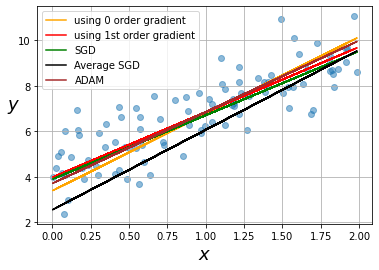

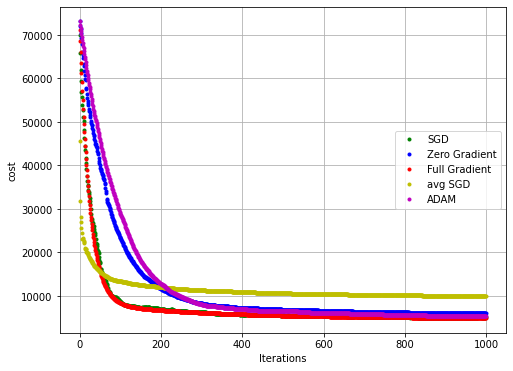

In [108]:
# Running ADAM
lr =0.01
n_iter = 1000
#theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta4,cost_history4,theta_history4 = ADAM(X_b,y,theta,lr,n_iter, b1=0.9, b2=0.999)
print('Theta: ', theta4)
print('Final cost/MSE:  {:0.3f}'.format(cost_history4[-1]))

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)

predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")
predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")
predy = np.dot(X_b,theta2)
plt.plot(X,predy, "green", label= "SGD")
predy = np.dot(X_b,theta3)
plt.plot(X,predy, "black", label= "Average SGD")
predy = np.dot(X_b,theta4)
plt.plot(X,predy, "brown", label= "ADAM")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))
ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history2,'g.', label = "SGD")
_=ax.plot(range(n_iter),cost_history0,'b.', label = "Zero Gradient")
_=ax.plot(range(n_iter),cost_history1,'r.', label = "Full Gradient")
_=ax.plot(range(n_iter),cost_history3,'y.', label = "avg SGD")
_=ax.plot(range(n_iter),cost_history4,'m.', label = "ADAM")
ax.legend(loc = "right")



In [109]:
print('ADAM Final cost/MSE:  {:0.3f}'.format(cost_history4[-1]))
print('Avg SGD Final cost/MSE:  {:0.3f}'.format(cost_history3[-1]))
print('SGD Final cost/MSE:  {:0.3f}'.format(cost_history2[-1]))
print('Full GD Final cost/MSE:  {:0.3f}'.format(cost_history1[-1]))
print('Zero Gradient Final cost/MSE:  {:0.3f}'.format(cost_history0[-1]))

ADAM Final cost/MSE:  5330.389
Avg SGD Final cost/MSE:  9945.528
SGD Final cost/MSE:  5058.548
Full GD Final cost/MSE:  4944.454
Zero Gradient Final cost/MSE:  5973.452


[[1.08011818]
 [2.14349861]] theta MOM


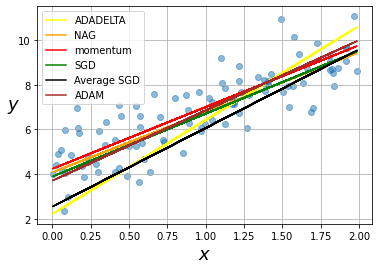

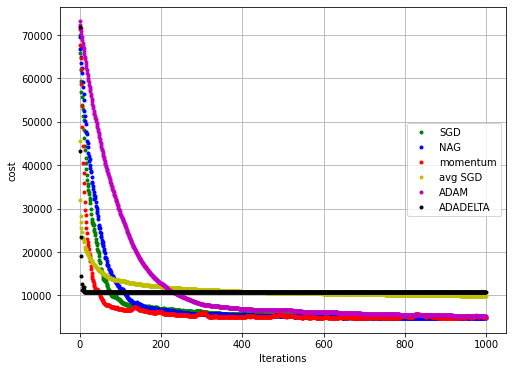

In [110]:
# Running NAG and momentume
lr =0.01
n_iter = 1000
#theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta5,cost_history5,theta_history5 = NAG(X_b,y,theta,lr,n_iter, momentum = 0.5)
theta6,cost_history6,theta_history6 = MOM(X_b,y,theta,lr,n_iter, momentum = 0.5)
theta7,cost_history7,theta_history7 = ADADELTA(X_b,y,theta,lr,n_iter, momentum = 0.1)


#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)

predy = np.dot(X_b,theta7)
plt.plot(X,predy, "yellow", label= "ADADELTA")
predy = np.dot(X_b,theta5)
plt.plot(X,predy, "orange", label= "NAG")
predy = np.dot(X_b,theta6)
plt.plot(X,predy, "red", label= "momentum")
predy = np.dot(X_b,theta2)
plt.plot(X,predy, "green", label= "SGD")
predy = np.dot(X_b,theta3)
plt.plot(X,predy, "black", label= "Average SGD")
predy = np.dot(X_b,theta4)
plt.plot(X,predy, "brown", label= "ADAM")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history2,'g.', label = "SGD")
_=ax.plot(range(n_iter),cost_history5,'b.', label = "NAG")
_=ax.plot(range(n_iter),cost_history6,'r.', label = "momentum")
_=ax.plot(range(n_iter),cost_history3,'y.', label = "avg SGD")
_=ax.plot(range(n_iter),cost_history4,'m.', label = "ADAM")
_=ax.plot(range(n_iter),cost_history7,'k.', label = "ADADELTA")


ax.legend(loc = "right")

ADAM Final cost/MSE:  5330.389
Avg SGD Final cost/MSE:  9945.528
SGD Final cost/MSE:  5058.548
Full GD Final cost/MSE:  4944.454
Zero Gradient Final cost/MSE:  5973.452
momentum Final cost/MSE:  4922.023
NAG Final cost/MSE:  4897.293
ADADELTA Final cost/MSE:  10715.066


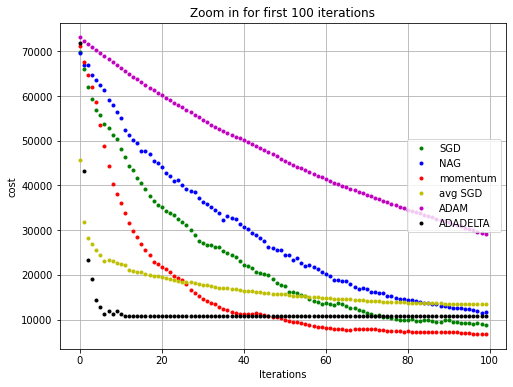

In [111]:
print('ADAM Final cost/MSE:  {:0.3f}'.format(cost_history4[-1]))
print('Avg SGD Final cost/MSE:  {:0.3f}'.format(cost_history3[-1]))
print('SGD Final cost/MSE:  {:0.3f}'.format(cost_history2[-1]))
print('Full GD Final cost/MSE:  {:0.3f}'.format(cost_history1[-1]))
print('Zero Gradient Final cost/MSE:  {:0.3f}'.format(cost_history0[-1]))
print('momentum Final cost/MSE:  {:0.3f}'.format(cost_history6[-1]))
print('NAG Final cost/MSE:  {:0.3f}'.format(cost_history5[-1]))
print('ADADELTA Final cost/MSE:  {:0.3f}'.format(cost_history7[-1]))


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.set_title('Zoom in for first 100 iterations')
ax.grid()
_=ax.plot(range(100),cost_history2[:100],'g.', label = "SGD")
_=ax.plot(range(100),cost_history5[:100],'b.', label = "NAG")
_=ax.plot(range(100),cost_history6[:100],'r.', label = "momentum")
_=ax.plot(range(100),cost_history3[:100],'y.', label = "avg SGD")
_=ax.plot(range(100),cost_history4[:100],'m.', label = "ADAM")
_=ax.plot(range(100),cost_history7[:100],'k.', label = "ADADELTA")

ax.legend(loc = "right")

**Comparinig models**

All the models converge but ADAdelta is the fastest but the accuracy is not high as others.
Adam surprisngly converges slower but has good accuracy
avg SGD convergence is faster but accuracy is lower than SGD unless iternations go close to 10000
interestingly , if we change the avg SGD model but taking average of gradient. that also works but it oscilates and finally convergers
Momemtum overall was impressive with accuracy and no of itrations as well.
I have tried other models as well but over all the results were not very different. infact the results were so close that for every iterations the lines crossed each other.
Overall great experience experimenting with these models.